# Regresión Lineal v3 - Modelo con 6 Períodos Históricos

Esta notebook implementa un modelo de regresión lineal para predecir las ventas (en toneladas) de productos 2 meses en el futuro, específicamente para febrero 2020, usando datos históricos hasta diciembre 2019.

**Diferencia con v2:** Este modelo utiliza solo **6 períodos históricos** (tn_0 a tn_5) en lugar de 12, lo que puede reducir el overfitting y mejorar la generalización del modelo con menos variables predictoras.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np


In [51]:

# Load the sales data (tab-delimited)
sell_in = pd.read_csv("datasets/sell-in.txt", sep="\t", dtype={"periodo": str})

# Load the stocks data (tab-delimited)
stocks = pd.read_csv("datasets/tb_stocks.txt", sep="\t", dtype={"periodo": str})

# Load the product information data (tab-delimited)
productos_info = pd.read_csv("datasets/tb_productos.txt", sep="\t")

#carga productos a predecir
productos_a_predecir = pd.read_csv("datasets/product_id_apredecir201912.txt", sep="\t",header=0)

In [52]:
#BORRAR
# import pandas as pd


# # 1) Carga de datos
# sell_in       = pd.read_csv('../data/sell-in.txt', sep='\t')
# prod_vigentes = pd.read_csv('../data/product_id_apredecir201912.txt', sep='\t')  # contiene al menos product_id
# productos = pd.read_csv('../data/tb_productos_05262025.txt', sep='\t')  # contiene al menos product_id


In [53]:
# 2) Parseo de 'periodo' a datetime
sell_in['periodo'] = pd.to_datetime(
    sell_in['periodo'].astype(str) + '01',
    format='%Y%m%d'
)

In [54]:
sell_in.head(10)

,periodo,customer_id,product_id,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn
0,2017-01-01,10234,20524,0,2,0.05300,0.05300
1,2017-01-01,10032,20524,0,1,0.13628,0.13628
2,2017-01-01,10217,20524,0,1,0.03028,0.03028
3,2017-01-01,10125,20524,0,1,0.02271,0.02271
4,2017-01-01,10012,20524,0,11,1.54452,1.54452
5,2017-01-01,10080,20524,0,1,0.01514,0.01514
6,2017-01-01,10015,20524,0,4,0.10600,0.10600
7,2017-01-01,10062,20524,0,1,0.18928,0.18928
8,2017-01-01,10159,20524,0,3,0.02271,0.02271
9,2017-01-01,10183,20524,0,1,0.01514,0.01514


In [55]:
sell_in.shape

(2945818, 7)

In [56]:
# sumatoria de cust_request_qty, cust_request_tn y tn por periodo, product_id
#cambiar nombre sell_in_agg por sell_in_acumulado
sell_in_agg = (
    sell_in
    .groupby(['periodo','product_id'], as_index=False)
    .agg({
        'tn': 'sum',
        'cust_request_qty': 'sum',
        'cust_request_tn': 'sum'
    })
)

In [57]:
# hacer un join con productos_a_predecir para trabajar sólo con eso

sell_in_agg = sell_in_agg.merge(
    productos_a_predecir[['product_id']],
    on='product_id',
    how='inner'
)

In [58]:
sell_in_agg.drop(columns=['cust_request_qty', 'cust_request_tn'], inplace=True)
sell_in_agg

,periodo,product_id,tn
0,2017-01-01,20001,934.77222
1,2017-01-01,20002,550.15707
2,2017-01-01,20003,1063.45835
3,2017-01-01,20004,555.91614
4,2017-01-01,20005,494.27011
...,...,...,...
22344,2019-12-01,21263,0.01270
22345,2019-12-01,21265,0.05007
22346,2019-12-01,21266,0.05121
22347,2019-12-01,21267,0.01569


In [59]:
# Crear un nuevo campo llamado tn_mas_2 que es el campo tn de 2 periodos a futuro
sell_in_agg['tn_mas_2'] = sell_in_agg.groupby(['product_id'])['tn'].shift(-2)


In [60]:
sell_in_agg

,periodo,product_id,tn,tn_mas_2
0,2017-01-01,20001,934.77222,1303.35771
1,2017-01-01,20002,550.15707,834.73521
2,2017-01-01,20003,1063.45835,917.16548
3,2017-01-01,20004,555.91614,489.91328
4,2017-01-01,20005,494.27011,563.89955
...,...,...,...,...
22344,2019-12-01,21263,0.01270,NaN
22345,2019-12-01,21265,0.05007,NaN
22346,2019-12-01,21266,0.05121,NaN
22347,2019-12-01,21267,0.01569,NaN


In [61]:
sell_in_agg[sell_in_agg['periodo'] == '2019-12-01']

,periodo,product_id,tn,tn_mas_2
21569,2019-12-01,20001,1504.68856,NaN
21570,2019-12-01,20002,1087.30855,NaN
21571,2019-12-01,20003,892.50129,NaN
21572,2019-12-01,20004,637.90002,NaN
21573,2019-12-01,20005,593.24443,NaN
...,...,...,...,...
22344,2019-12-01,21263,0.01270,NaN
22345,2019-12-01,21265,0.05007,NaN
22346,2019-12-01,21266,0.05121,NaN
22347,2019-12-01,21267,0.01569,NaN


In [62]:
sell_in_agg['mean_last_3m'] = (
    sell_in_agg
      .groupby('product_id')['tn']
      .apply(lambda x: x.rolling(window=3, min_periods=1).mean())
      .reset_index(level=0, drop=True)
)

In [ ]:
for lag in range (1, 7):  # Cambiado de 12 a 7 para usar solo 6 lags (tn_1 a tn_6)
    sell_in_agg[f'tn_{lag}'] = (sell_in_agg
        .groupby(['product_id'])['tn']
        .shift(lag)
    )

In [64]:
# Renombrar el campo tn a tn_0
sell_in_agg.rename(columns={'tn': 'tn_0'}, inplace=True)

In [65]:
sell_in_agg


,periodo,product_id,tn_0,tn_mas_2,mean_last_3m,tn_1,tn_2,tn_3,tn_4,tn_5,tn_6,tn_7,tn_8,tn_9,tn_10,tn_11
0,2017-01-01,20001,934.77222,1303.35771,934.772220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01,20002,550.15707,834.73521,550.157070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-01,20003,1063.45835,917.16548,1063.458350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-01,20004,555.91614,489.91328,555.916140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-01,20005,494.27011,563.89955,494.270110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22344,2019-12-01,21263,0.01270,NaN,0.020230,0.03247,0.01552,0.01128,0.03388,0.03387,0.00988,0.02258,0.01835,0.06636,0.05927,0.04376
22345,2019-12-01,21265,0.05007,NaN,0.075093,0.06600,0.10921,0.01707,0.01593,0.02959,0.05121,0.17635,0.36405,0.01593,NaN,NaN
22346,2019-12-01,21266,0.05121,NaN,0.078883,0.06713,0.11831,0.02844,0.01480,0.05916,0.05235,0.17634,0.36178,0.01707,NaN,NaN
22347,2019-12-01,21267,0.01569,NaN,0.050990,0.04052,0.09676,0.01830,0.04054,0.07452,0.05882,0.24451,0.12291,0.21578,NaN,NaN


In [ ]:
from sklearn.linear_model import LinearRegression

#  Filtras sólo diciembre 2018 y eliminas filas incompletas:
# Ahora solo necesitamos 6 variables (tn_0 a tn_5) en lugar de 12
dataset_training = (
        sell_in_agg[sell_in_agg['periodo'] == '2018-12-01']
      .dropna(subset=['tn_mas_2'] + [f'tn_{i}' for i in range(6)])  # Cambiado de 12 a 6  # Cambiado de 12 a 6
)

In [67]:
dataset_training

,periodo,product_id,tn_0,tn_mas_2,mean_last_3m,tn_1,tn_2,tn_3,tn_4,tn_5,tn_6,tn_7,tn_8,tn_9,tn_10,tn_11
12906,2018-12-01,20001,1486.68669,1259.09363,1864.966707,1813.01511,2295.19832,1438.67455,1800.96168,1470.41009,1150.79169,1293.89788,1251.28462,1856.83534,1043.76470,1169.07532
12907,2018-12-01,20002,1009.45458,1043.01349,1384.918527,1766.81068,1378.49032,954.23575,1161.88430,977.40239,1033.82845,1103.39191,999.20934,966.86044,712.00087,984.80167
12908,2018-12-01,20003,769.82869,758.32657,1096.696177,1206.91773,1313.34211,912.34156,955.97079,656.22700,660.73323,784.35885,765.47838,778.55594,788.30749,907.56304
12909,2018-12-01,20004,585.56477,441.70332,732.527440,802.34669,809.67086,948.86342,936.42001,653.42310,447.84475,641.37063,611.51237,488.92473,503.65326,415.52538
12910,2018-12-01,20005,372.63428,409.89950,578.546193,469.26344,893.74086,761.77520,874.88924,502.34077,547.62513,637.11135,496.41774,559.98671,399.20878,417.53208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13545,2018-12-01,21207,0.12478,0.18451,0.125490,0.11475,0.13694,0.12438,0.18884,0.21173,0.24206,0.21064,0.19744,0.35279,0.27239,0.39088
13547,2018-12-01,21212,0.09869,0.12051,0.159813,0.13082,0.24993,0.12490,0.17085,0.16847,0.21680,0.28263,0.19330,0.22093,0.22882,0.24341
13548,2018-12-01,21218,0.03092,0.05751,0.045113,0.02618,0.07824,0.07952,0.20672,0.16725,0.09627,0.14214,0.19183,0.16635,0.03003,0.04950
13549,2018-12-01,21222,0.02839,0.03786,0.049983,0.04150,0.08006,0.06261,0.09394,0.09829,0.08301,0.09830,0.09173,0.06919,0.04879,0.12522


In [68]:

dataset_training.drop(columns=['periodo'], inplace=True)

In [69]:
dataset_training

,product_id,tn_0,tn_mas_2,mean_last_3m,tn_1,tn_2,tn_3,tn_4,tn_5,tn_6,tn_7,tn_8,tn_9,tn_10,tn_11
12906,20001,1486.68669,1259.09363,1864.966707,1813.01511,2295.19832,1438.67455,1800.96168,1470.41009,1150.79169,1293.89788,1251.28462,1856.83534,1043.76470,1169.07532
12907,20002,1009.45458,1043.01349,1384.918527,1766.81068,1378.49032,954.23575,1161.88430,977.40239,1033.82845,1103.39191,999.20934,966.86044,712.00087,984.80167
12908,20003,769.82869,758.32657,1096.696177,1206.91773,1313.34211,912.34156,955.97079,656.22700,660.73323,784.35885,765.47838,778.55594,788.30749,907.56304
12909,20004,585.56477,441.70332,732.527440,802.34669,809.67086,948.86342,936.42001,653.42310,447.84475,641.37063,611.51237,488.92473,503.65326,415.52538
12910,20005,372.63428,409.89950,578.546193,469.26344,893.74086,761.77520,874.88924,502.34077,547.62513,637.11135,496.41774,559.98671,399.20878,417.53208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13545,21207,0.12478,0.18451,0.125490,0.11475,0.13694,0.12438,0.18884,0.21173,0.24206,0.21064,0.19744,0.35279,0.27239,0.39088
13547,21212,0.09869,0.12051,0.159813,0.13082,0.24993,0.12490,0.17085,0.16847,0.21680,0.28263,0.19330,0.22093,0.22882,0.24341
13548,21218,0.03092,0.05751,0.045113,0.02618,0.07824,0.07952,0.20672,0.16725,0.09627,0.14214,0.19183,0.16635,0.03003,0.04950
13549,21222,0.02839,0.03786,0.049983,0.04150,0.08006,0.06261,0.09394,0.09829,0.08301,0.09830,0.09173,0.06919,0.04879,0.12522


In [ ]:
# # 3) Definir X e y:
# feature_cols = [f'tn_{i}' for i in range(6)]   # ['tn_0','tn_1',…,'tn_5'] - Cambiado de 12 a 6
# X_train = dataset_training[feature_cols]
# y_train = dataset_training['tn_mas_2']

In [71]:
# # 4) Ajustar la regresión lineal:
# lr = LinearRegression()
# lr.fit(X_train, y_train)


In [72]:


# # 5) Echa un vistazo a R² en el mismo train (o en cross-val):
# print("R² en diciembre 2018:", lr.score(X_train, y_train))

# # 6) Cuando quieras predecir febrero 2020, construye otro 
# #    DataFrame análogo para periodo='2019-12-01' y usa:
# # X_new = df[df['periodo']=='2019-12-01'][feature_cols]
# # y_pred = lr.predict(X_new)

In [73]:
# PASO 1: Preparar el dataset completo para entrenamiento
# En esta versión NO filtramos productos "mágicos"
# Usaremos TODOS los productos disponibles en diciembre 2018 que tengan datos completos
# Esto debería dar un modelo más robusto y generalizable

print(f"Dataset de entrenamiento original: {len(dataset_training)} productos")
print(f"Productos disponibles para entrenar el modelo con datos completos")

Dataset de entrenamiento original: 567 productos
Productos disponibles para entrenar el modelo con datos completos


In [74]:
# PASO 2: Usar el dataset completo de entrenamiento
# Usamos directamente el dataset_training que ya contiene todos los productos
# de diciembre 2018 con datos completos (sin NaN)
df_completo = dataset_training.copy()
print(f"Entrenando con {len(df_completo)} productos")

Entrenando con 567 productos


In [75]:
# PASO 3: Preparar el dataset sin filtros
# NO filtramos por productos específicos - usamos todos los disponibles
# Solo establecemos product_id como índice para facilitar las operaciones
df_completo = df_completo.set_index('product_id')
print(f"Dataset preparado con {len(df_completo)} productos")

Dataset preparado con 567 productos


In [76]:
# PASO 4: Limpiar el dataset eliminando columnas innecesarias
# Eliminamos 'mean_last_3m' porque no la vamos a usar como feature en el modelo
# Solo queremos las columnas tn_0, tn_1, ..., tn_11 como variables predictoras
df_completo.drop(columns=['mean_last_3m'], inplace=True)
print(f"Columnas disponibles: {list(df_completo.columns)}")
df_completo

Columnas disponibles: ['tn_0', 'tn_mas_2', 'tn_1', 'tn_2', 'tn_3', 'tn_4', 'tn_5', 'tn_6', 'tn_7', 'tn_8', 'tn_9', 'tn_10', 'tn_11']


,tn_0,tn_mas_2,tn_1,tn_2,tn_3,tn_4,tn_5,tn_6,tn_7,tn_8,tn_9,tn_10,tn_11
product_id,,,,,,,,,,,,,
20001,1486.68669,1259.09363,1813.01511,2295.19832,1438.67455,1800.96168,1470.41009,1150.79169,1293.89788,1251.28462,1856.83534,1043.76470,1169.07532
20002,1009.45458,1043.01349,1766.81068,1378.49032,954.23575,1161.88430,977.40239,1033.82845,1103.39191,999.20934,966.86044,712.00087,984.80167
20003,769.82869,758.32657,1206.91773,1313.34211,912.34156,955.97079,656.22700,660.73323,784.35885,765.47838,778.55594,788.30749,907.56304
20004,585.56477,441.70332,802.34669,809.67086,948.86342,936.42001,653.42310,447.84475,641.37063,611.51237,488.92473,503.65326,415.52538
20005,372.63428,409.89950,469.26344,893.74086,761.77520,874.88924,502.34077,547.62513,637.11135,496.41774,559.98671,399.20878,417.53208
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21207,0.12478,0.18451,0.11475,0.13694,0.12438,0.18884,0.21173,0.24206,0.21064,0.19744,0.35279,0.27239,0.39088
21212,0.09869,0.12051,0.13082,0.24993,0.12490,0.17085,0.16847,0.21680,0.28263,0.19330,0.22093,0.22882,0.24341
21218,0.03092,0.05751,0.02618,0.07824,0.07952,0.20672,0.16725,0.09627,0.14214,0.19183,0.16635,0.03003,0.04950


In [77]:
# Información del dataset completo
print("Información del dataset completo para entrenamiento:")
df_completo.info()

Información del dataset completo para entrenamiento:
<class 'pandas.core.frame.DataFrame'>
Index: 567 entries, 20001 to 21224
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tn_0      567 non-null    float64
 1   tn_mas_2  567 non-null    float64
 2   tn_1      567 non-null    float64
 3   tn_2      567 non-null    float64
 4   tn_3      567 non-null    float64
 5   tn_4      567 non-null    float64
 6   tn_5      567 non-null    float64
 7   tn_6      567 non-null    float64
 8   tn_7      567 non-null    float64
 9   tn_8      567 non-null    float64
 10  tn_9      567 non-null    float64
 11  tn_10     567 non-null    float64
 12  tn_11     567 non-null    float64
dtypes: float64(13)
memory usage: 62.0 KB


In [ ]:
# PASO 5: Preparar las variables para el modelo de regresión lineal
# X (variables predictoras): Los valores de ventas de los últimos 12 períodos
feature_cols = [f'tn_{i}' for i in range(6)]   # ['tn_0','tn_1',…,'tn_5'] - Cambiado de 12 a 6\nX_train = df_completo[feature_cols]

# y (variable objetivo): El valor que queremos predecir (ventas 2 períodos adelante)
y_train = df_completo['tn_mas_2']

print(f"Dimensiones del conjunto de entrenamiento:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"Total de productos para entrenar: {len(X_train)}")

Dimensiones del conjunto de entrenamiento:
X_train: (567, 12)
y_train: (567,)
Total de productos para entrenar: 567


In [79]:
# PASO 6: Entrenar el modelo de regresión lineal con TODOS los datos
# Creamos una instancia del modelo LinearRegression de scikit-learn
lr = LinearRegression()

# Entrenamos el modelo con TODOS los productos disponibles de diciembre 2018
# Esto debería dar un modelo más robusto al usar más datos de entrenamiento
print(f"Entrenando modelo con {len(X_train)} productos...")
lr.fit(X_train, y_train)
print("✓ Modelo entrenado exitosamente")

Entrenando modelo con 567 productos...
✓ Modelo entrenado exitosamente


In [80]:
# Entrenar el modelo

In [81]:
# PASO 7: Evaluar la calidad del modelo
# R² (coeficiente de determinación) mide qué tan bien el modelo explica la variabilidad
# Valores cercanos a 1 indican un buen ajuste, valores cercanos a 0 indican mal ajuste
r2_score = lr.score(X_train, y_train)
print(f"R² en diciembre 2018 (con todos los datos): {r2_score:.4f}")
print(f"El modelo explica {r2_score*100:.2f}% de la variabilidad en los datos")

R² en diciembre 2018 (con todos los datos): 0.9777
El modelo explica 97.77% de la variabilidad en los datos


In [82]:
# PASO 8: Analizar los coeficientes del modelo entrenado con todos los datos
# Los coeficientes nos dicen cuánto peso tiene cada período pasado en la predicción
# Coeficientes positivos: períodos que contribuyen positivamente a las ventas futuras
# Coeficientes negativos: períodos que contribuyen negativamente
coeficientes = pd.Series(lr.coef_, index=feature_cols)
coeficientes_ordenados = coeficientes.sort_values(ascending=False)

print("Coeficientes del modelo (ordenados por importancia):")
print(coeficientes_ordenados)
print(f"\nCoeficiente más importante: {coeficientes_ordenados.index[0]} = {coeficientes_ordenados.iloc[0]:.4f}")
print(f"Coeficiente menos importante: {coeficientes_ordenados.index[-1]} = {coeficientes_ordenados.iloc[-1]:.4f}")

coeficientes_ordenados

Coeficientes del modelo (ordenados por importancia):
tn_0     0.314563
tn_2     0.160457
tn_10    0.140669
tn_11    0.123846
tn_1     0.119418
tn_7     0.097088
tn_6     0.071892
tn_8     0.060479
tn_9     0.041922
tn_5    -0.033436
tn_3    -0.059655
tn_4    -0.158985
dtype: float64

Coeficiente más importante: tn_0 = 0.3146
Coeficiente menos importante: tn_4 = -0.1590


tn_0     0.314563
tn_2     0.160457
tn_10    0.140669
tn_11    0.123846
tn_1     0.119418
tn_7     0.097088
tn_6     0.071892
tn_8     0.060479
tn_9     0.041922
tn_5    -0.033436
tn_3    -0.059655
tn_4    -0.158985
dtype: float64

In [83]:
# PASO 9: Mostrar el intercepto del modelo
# El intercepto es el valor base de la predicción cuando todas las variables son 0
# Representa el "nivel base" de ventas independiente de los valores históricos
print(f"Intercepto del modelo: {lr.intercept_:.4f}")
print("Este es el valor base de predicción cuando no hay historial de ventas")

Intercepto del modelo: 2.5486
Este es el valor base de predicción cuando no hay historial de ventas


In [84]:
# Realizar un merge entre sell_in para el periodo 2019-12-01 con prod_vigentes para quedarnos sólo con los productos vigentes

# Crear un nuevo campo llamado tn_mas_2 que es el campo tn de 2 periodos a futuro
# sell_in_agg['tn_mas_2'] = sell_in_agg.groupby(['product_id'])['tn'].shift(-2)
dataset_201912_a_predecir = (
    sell_in_agg[sell_in_agg['periodo'] == '2019-12-01']
      .merge(productos_a_predecir[['product_id']], on='product_id', how='inner')
)
dataset_201912_a_predecir

,periodo,product_id,tn_0,tn_mas_2,mean_last_3m,tn_1,tn_2,tn_3,tn_4,tn_5,tn_6,tn_7,tn_8,tn_9,tn_10,tn_11
0,2019-12-01,20001,1504.68856,NaN,1487.855463,1397.37231,1561.50552,1660.00561,1261.34529,1678.99318,1109.93769,1629.78233,1647.63848,1470.65653,1259.09363,1275.77351
1,2019-12-01,20002,1087.30855,NaN,1496.807430,1423.57739,1979.53635,1090.18771,813.78215,1066.44999,928.36431,1034.98927,1287.62346,1083.62552,1043.01349,1266.78751
2,2019-12-01,20003,892.50129,NaN,974.053890,948.29393,1081.36645,967.77116,635.59563,715.20314,662.38654,590.12515,565.33774,638.04010,758.32657,964.76919
3,2019-12-01,20004,637.90002,NaN,808.846137,723.94206,1064.69633,786.17140,482.13372,521.71519,667.19411,603.31081,466.70901,619.77084,441.70332,511.33713
4,2019-12-01,20005,593.24443,NaN,732.312970,606.91173,996.78275,879.52808,536.66800,745.74978,876.39696,897.26297,624.99880,488.21387,409.89950,363.58438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,2019-12-01,21263,0.01270,NaN,0.020230,0.03247,0.01552,0.01128,0.03388,0.03387,0.00988,0.02258,0.01835,0.06636,0.05927,0.04376
776,2019-12-01,21265,0.05007,NaN,0.075093,0.06600,0.10921,0.01707,0.01593,0.02959,0.05121,0.17635,0.36405,0.01593,NaN,NaN
777,2019-12-01,21266,0.05121,NaN,0.078883,0.06713,0.11831,0.02844,0.01480,0.05916,0.05235,0.17634,0.36178,0.01707,NaN,NaN
778,2019-12-01,21267,0.01569,NaN,0.050990,0.04052,0.09676,0.01830,0.04054,0.07452,0.05882,0.24451,0.12291,0.21578,NaN,NaN


In [ ]:
dataset_201912_a_predecir.drop(columns=['tn_mas_2'], inplace=True)


In [86]:
dataset_201912_a_predecir

,periodo,product_id,tn_0,mean_last_3m,tn_1,tn_2,tn_3,tn_4,tn_5,tn_6,tn_7,tn_8,tn_9,tn_10,tn_11
0,2019-12-01,20001,1504.68856,1487.855463,1397.37231,1561.50552,1660.00561,1261.34529,1678.99318,1109.93769,1629.78233,1647.63848,1470.65653,1259.09363,1275.77351
1,2019-12-01,20002,1087.30855,1496.807430,1423.57739,1979.53635,1090.18771,813.78215,1066.44999,928.36431,1034.98927,1287.62346,1083.62552,1043.01349,1266.78751
2,2019-12-01,20003,892.50129,974.053890,948.29393,1081.36645,967.77116,635.59563,715.20314,662.38654,590.12515,565.33774,638.04010,758.32657,964.76919
3,2019-12-01,20004,637.90002,808.846137,723.94206,1064.69633,786.17140,482.13372,521.71519,667.19411,603.31081,466.70901,619.77084,441.70332,511.33713
4,2019-12-01,20005,593.24443,732.312970,606.91173,996.78275,879.52808,536.66800,745.74978,876.39696,897.26297,624.99880,488.21387,409.89950,363.58438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,2019-12-01,21263,0.01270,0.020230,0.03247,0.01552,0.01128,0.03388,0.03387,0.00988,0.02258,0.01835,0.06636,0.05927,0.04376
776,2019-12-01,21265,0.05007,0.075093,0.06600,0.10921,0.01707,0.01593,0.02959,0.05121,0.17635,0.36405,0.01593,NaN,NaN
777,2019-12-01,21266,0.05121,0.078883,0.06713,0.11831,0.02844,0.01480,0.05916,0.05235,0.17634,0.36178,0.01707,NaN,NaN
778,2019-12-01,21267,0.01569,0.050990,0.04052,0.09676,0.01830,0.04054,0.07452,0.05882,0.24451,0.12291,0.21578,NaN,NaN


In [87]:
dataset_656 = dataset_201912_a_predecir.dropna()
dataset_656

,periodo,product_id,tn_0,mean_last_3m,tn_1,tn_2,tn_3,tn_4,tn_5,tn_6,tn_7,tn_8,tn_9,tn_10,tn_11
0,2019-12-01,20001,1504.68856,1487.855463,1397.37231,1561.50552,1660.00561,1261.34529,1678.99318,1109.93769,1629.78233,1647.63848,1470.65653,1259.09363,1275.77351
1,2019-12-01,20002,1087.30855,1496.807430,1423.57739,1979.53635,1090.18771,813.78215,1066.44999,928.36431,1034.98927,1287.62346,1083.62552,1043.01349,1266.78751
2,2019-12-01,20003,892.50129,974.053890,948.29393,1081.36645,967.77116,635.59563,715.20314,662.38654,590.12515,565.33774,638.04010,758.32657,964.76919
3,2019-12-01,20004,637.90002,808.846137,723.94206,1064.69633,786.17140,482.13372,521.71519,667.19411,603.31081,466.70901,619.77084,441.70332,511.33713
4,2019-12-01,20005,593.24443,732.312970,606.91173,996.78275,879.52808,536.66800,745.74978,876.39696,897.26297,624.99880,488.21387,409.89950,363.58438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,2019-12-01,21248,0.01129,0.017877,0.02964,0.01270,0.01411,0.02117,0.02116,0.00988,0.01553,0.03106,0.05365,0.06209,0.02962
772,2019-12-01,21256,0.01271,0.016000,0.02682,0.00847,0.00423,0.02965,0.02822,0.00988,0.01553,0.01835,0.05930,0.05081,0.03811
773,2019-12-01,21259,0.01412,0.021173,0.02965,0.01975,0.00564,0.03106,0.04657,0.00988,0.01976,0.02117,0.06777,0.05080,0.04234
774,2019-12-01,21262,0.01834,0.020697,0.02682,0.01693,0.01552,0.02258,0.03953,0.01270,0.01130,0.01412,0.06353,0.05786,0.02680


In [88]:
# Obtener el complemento de los 124 elementos
dataset_124 = dataset_201912_a_predecir[dataset_201912_a_predecir.isna().any(axis=1)]
dataset_124

,periodo,product_id,tn_0,mean_last_3m,tn_1,tn_2,tn_3,tn_4,tn_5,tn_6,tn_7,tn_8,tn_9,tn_10,tn_11
31,2019-12-01,20032,527.79811,728.554807,906.69823,751.16808,629.90072,703.14059,698.02627,605.54931,488.43471,361.38220,573.57324,247.9988,NaN
111,2019-12-01,20127,170.32792,273.648603,463.80054,186.81735,12.80399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,2019-12-01,20174,91.11780,102.493790,68.84756,147.51601,129.99999,120.97136,171.23158,73.99801,NaN,NaN,NaN,NaN,NaN
171,2019-12-01,20210,58.78261,106.976320,134.38972,127.75663,7.78032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,2019-12-01,20213,58.84043,87.258370,104.19056,98.74412,86.10789,42.71804,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,2019-12-01,21252,0.08560,0.101890,0.11982,0.10025,0.14427,0.13446,0.02691,0.07824,0.47194,0.23471,0.38391,NaN,NaN
776,2019-12-01,21265,0.05007,0.075093,0.06600,0.10921,0.01707,0.01593,0.02959,0.05121,0.17635,0.36405,0.01593,NaN,NaN
777,2019-12-01,21266,0.05121,0.078883,0.06713,0.11831,0.02844,0.01480,0.05916,0.05235,0.17634,0.36178,0.01707,NaN,NaN
778,2019-12-01,21267,0.01569,0.050990,0.04052,0.09676,0.01830,0.04054,0.07452,0.05882,0.24451,0.12291,0.21578,NaN,NaN


In [89]:
lags = [f"tn_{i}" for i in range(1, 12)]

# ejemplo de DataFrame
# df = pd.read_csv(… )

# 1) Calcula la media por fila (ignorando NaN) en las columnas tn_1…tn_11
row_means = dataset_124[lags].mean(axis=1)

# 2) Rellena los NaN de cada columna con la media de su propia fila
dataset_124[lags] = dataset_124[lags].apply(
    lambda row: row.fillna(row.mean()),
    axis=1
)

# —– o equivalentemente —–

dataset_124[lags] = dataset_124[lags].fillna(row_means, axis=0)

C:\Users\paola\AppData\Local\Temp\ipykernel_25576\353778797.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_124[lags] = dataset_124[lags].apply(
C:\Users\paola\AppData\Local\Temp\ipykernel_25576\353778797.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_124[lags] = dataset_124[lags].fillna(row_means, axis=0)


In [90]:
dataset_124

,periodo,product_id,tn_0,mean_last_3m,tn_1,tn_2,tn_3,tn_4,tn_5,tn_6,tn_7,tn_8,tn_9,tn_10,tn_11
31,2019-12-01,20032,527.79811,728.554807,906.69823,751.16808,629.90072,703.140590,698.026270,605.549310,488.434710,361.382200,573.573240,247.998800,596.587215
111,2019-12-01,20127,170.32792,273.648603,463.80054,186.81735,12.80399,221.140627,221.140627,221.140627,221.140627,221.140627,221.140627,221.140627,221.140627
144,2019-12-01,20174,91.11780,102.493790,68.84756,147.51601,129.99999,120.971360,171.231580,73.998010,118.760752,118.760752,118.760752,118.760752,118.760752
171,2019-12-01,20210,58.78261,106.976320,134.38972,127.75663,7.78032,89.975557,89.975557,89.975557,89.975557,89.975557,89.975557,89.975557,89.975557
174,2019-12-01,20213,58.84043,87.258370,104.19056,98.74412,86.10789,42.718040,82.940153,82.940153,82.940153,82.940153,82.940153,82.940153,82.940153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,2019-12-01,21252,0.08560,0.101890,0.11982,0.10025,0.14427,0.134460,0.026910,0.078240,0.471940,0.234710,0.383910,0.188279,0.188279
776,2019-12-01,21265,0.05007,0.075093,0.06600,0.10921,0.01707,0.015930,0.029590,0.051210,0.176350,0.364050,0.015930,0.093927,0.093927
777,2019-12-01,21266,0.05121,0.078883,0.06713,0.11831,0.02844,0.014800,0.059160,0.052350,0.176340,0.361780,0.017070,0.099487,0.099487
778,2019-12-01,21267,0.01569,0.050990,0.04052,0.09676,0.01830,0.040540,0.074520,0.058820,0.244510,0.122910,0.215780,0.101407,0.101407


In [91]:
# Sumar todos los tn_0 del dataset dataset_656
tn_0 = dataset_656['tn_0'].sum()
tn_0

np.float64(23447.85905)

In [92]:
tn_0_nan = dataset_124['tn_0'].sum()
tn_0_nan

np.float64(1697.39303)

In [93]:
# Merge de dataset_124 con dataset_656
dataset_final = pd.concat([dataset_124, dataset_656], ignore_index=True)
dataset_final.drop(columns=['mean_last_3m','periodo'], inplace=True)
dataset_final

,product_id,tn_0,tn_1,tn_2,tn_3,tn_4,tn_5,tn_6,tn_7,tn_8,tn_9,tn_10,tn_11
0,20032,527.79811,906.69823,751.16808,629.90072,703.140590,698.026270,605.549310,488.434710,361.382200,573.573240,247.998800,596.587215
1,20127,170.32792,463.80054,186.81735,12.80399,221.140627,221.140627,221.140627,221.140627,221.140627,221.140627,221.140627,221.140627
2,20174,91.11780,68.84756,147.51601,129.99999,120.971360,171.231580,73.998010,118.760752,118.760752,118.760752,118.760752,118.760752
3,20210,58.78261,134.38972,127.75663,7.78032,89.975557,89.975557,89.975557,89.975557,89.975557,89.975557,89.975557,89.975557
4,20213,58.84043,104.19056,98.74412,86.10789,42.718040,82.940153,82.940153,82.940153,82.940153,82.940153,82.940153,82.940153
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,21248,0.01129,0.02964,0.01270,0.01411,0.021170,0.021160,0.009880,0.015530,0.031060,0.053650,0.062090,0.029620
776,21256,0.01271,0.02682,0.00847,0.00423,0.029650,0.028220,0.009880,0.015530,0.018350,0.059300,0.050810,0.038110
777,21259,0.01412,0.02965,0.01975,0.00564,0.031060,0.046570,0.009880,0.019760,0.021170,0.067770,0.050800,0.042340
778,21262,0.01834,0.02682,0.01693,0.01552,0.022580,0.039530,0.012700,0.011300,0.014120,0.063530,0.057860,0.026800


In [94]:
# PASO 10: Aplicar el modelo entrenado para hacer predicciones
# Usamos el dataset_final que contiene todos los productos vigentes para dic-2019
# El modelo entrenado con TODOS los datos de dic-2018 se aplica a todos los productos
X_new = dataset_final
y_pred = lr.predict(X_new[feature_cols])

print(f"Generando predicciones para {len(X_new)} productos...")

# PASO 11: Crear DataFrame con las predicciones
# Organizamos los resultados en un DataFrame con product_id y la predicción
predicciones = pd.DataFrame({
    'product_id': X_new['product_id'],
    'tn_mas_2_pred': y_pred  # Predicción de ventas para febrero 2020
})

print(f"✓ Predicciones generadas para {len(predicciones)} productos")

Generando predicciones para 780 productos...
✓ Predicciones generadas para 780 productos


In [95]:
# PASO 12: Ordenar las predicciones por product_id
# Esto facilita la revisión y comparación de resultados
predicciones.sort_values(by='product_id', inplace=True)
predicciones

,product_id,tn_mas_2_pred
124,20001,1272.038684
125,20002,1196.271738
126,20003,779.366959
127,20004,605.713230
128,20005,569.928575
...,...,...
779,21263,2.572287
120,21265,2.653513
121,21266,2.655442
122,21267,2.635107


In [96]:
# PASO 13: Renombrar la columna de predicción
# Cambiamos el nombre para que sea más claro y coincida con el formato esperado
predicciones.rename(columns={'tn_mas_2_pred': 'tn'}, inplace=True)

In [97]:
# Guardar las predicciones en un archivo CSV
#predicciones.to_csv('../data/pred_regresion_lineal01.csv', index=False)

es el arhivo submiteado regresion lineal 02

In [98]:
# PASO 14: Guardar las predicciones en un archivo CSV
# Exportamos los resultados para poder usarlos en análisis posteriores o para envío
# Usamos encoding="utf-8" para asegurar compatibilidad con caracteres especiales
# El archivo se llama v2 para diferenciarlo del modelo con productos mágicos

filename = "data/pred_regresion_lineal_v2_todos_los_datos.csv"
predicciones.to_csv(filename, index=False, encoding="utf-8")
print(f"✓ Predicciones guardadas en: {filename}")
print(f"Total de predicciones: {len(predicciones)}")

✓ Predicciones guardadas en: data/pred_regresion_lineal_v2_todos_los_datos.csv
Total de predicciones: 780


## Resumen del Modelo v2

**Diferencias clave con respecto a v1:**
- ✅ **Más datos de entrenamiento**: Usa todos los productos disponibles en dic-2018
- ✅ **Mayor robustez**: No depende de una selección manual de productos
- ✅ **Mejor generalización**: El modelo aprende de patrones más diversos
- ✅ **Más representativo**: Captura la variabilidad real de todos los productos

**Métricas del modelo:**
- Productos usados para entrenar: Todos los disponibles con datos completos
- R² obtenido: Ver resultado arriba
- Predicciones generadas: 780 productos para febrero 2020

In [ ]:
## Ajuste de Predicciones con Coeficientes de Regresión Lineal

En esta sección vamos a:
1. Cargar las predicciones de `pred_medias_12_093.csv`
2. Aplicar los coeficientes del modelo de regresión lineal entrenado
3. Generar el archivo `pred_093_12_ajustado_rl02.csv`

In [99]:
# PASO 15: Cargar las predicciones base de medias
# Cargamos el archivo pred_medias_12_093.csv que contiene las predicciones base
try:
    pred_medias_093 = pd.read_csv("data/pred_medias_12_093.csv")
    print(f"✓ Archivo cargado exitosamente: {len(pred_medias_093)} productos")
    print(f"Columnas disponibles: {list(pred_medias_093.columns)}")
    pred_medias_093.head()
except FileNotFoundError:
    print("❌ Error: No se encontró el archivo data/pred_medias_12_093.csv")
    print("Verifica que el archivo existe en la carpeta data/")
    pred_medias_093 = None

✓ Archivo cargado exitosamente: 780 productos
Columnas disponibles: ['product_id', 'tn']


In [100]:
# PASO 16: Calcular el factor de ajuste del modelo de regresión lineal
# Para cada producto, vamos a calcular cuál sería la predicción del modelo de regresión
# basándose en sus valores históricos, y usar eso como factor de ajuste

if pred_medias_093 is not None:
    # Verificar que tenemos los mismos productos
    productos_comunes = set(pred_medias_093['product_id']) & set(dataset_final['product_id'])
    print(f"Productos en común entre pred_medias_093 y dataset_final: {len(productos_comunes)}")
    
    # Filtrar solo productos comunes
    pred_medias_filtrado = pred_medias_093[pred_medias_093['product_id'].isin(productos_comunes)].copy()
    dataset_para_ajuste = dataset_final[dataset_final['product_id'].isin(productos_comunes)].copy()
    
    print(f"Productos que se pueden ajustar: {len(pred_medias_filtrado)}")
else:
    print("No se puede proceder sin el archivo base")

Productos en común entre pred_medias_093 y dataset_final: 780
Productos que se pueden ajustar: 780


In [101]:
# PASO 17: Aplicar el ajuste de regresión lineal
if pred_medias_093 is not None and len(productos_comunes) > 0:
    # Ordenar ambos DataFrames por product_id para asegurar alineación
    pred_medias_filtrado = pred_medias_filtrado.sort_values('product_id').reset_index(drop=True)
    dataset_para_ajuste = dataset_para_ajuste.sort_values('product_id').reset_index(drop=True)
    
    # Generar predicciones del modelo de regresión para estos productos
    X_ajuste = dataset_para_ajuste[feature_cols]
    prediccion_rl = lr.predict(X_ajuste)
    
    # Calcular factor de ajuste: predicción_RL / predicción_media
    # Este factor nos dice cuánto debemos multiplicar la predicción de media
    pred_medias_filtrado['prediccion_rl'] = prediccion_rl
    
    # Evitar división por cero
    pred_medias_filtrado['factor_ajuste'] = np.where(
        pred_medias_filtrado['tn'] != 0,
        pred_medias_filtrado['prediccion_rl'] / pred_medias_filtrado['tn'],
        1.0  # Si la predicción original es 0, no ajustamos
    )
    
    # Aplicar el ajuste
    pred_medias_filtrado['tn_ajustado'] = pred_medias_filtrado['tn'] * pred_medias_filtrado['factor_ajuste']
    
    print("Estadísticas del ajuste:")
    print(f"Factor de ajuste promedio: {pred_medias_filtrado['factor_ajuste'].mean():.4f}")
    print(f"Factor de ajuste mediano: {pred_medias_filtrado['factor_ajuste'].median():.4f}")
    print(f"Rango del factor: {pred_medias_filtrado['factor_ajuste'].min():.4f} - {pred_medias_filtrado['factor_ajuste'].max():.4f}")
    
    pred_medias_filtrado[['product_id', 'tn', 'prediccion_rl', 'factor_ajuste', 'tn_ajustado']].head(10)

Estadísticas del ajuste:
Factor de ajuste promedio: 3.4772
Factor de ajuste mediano: 1.2272
Rango del factor: 0.4562 - 109.7294


In [102]:
# PASO 18: Crear el archivo final ajustado
if pred_medias_093 is not None and len(productos_comunes) > 0:
    # Crear el DataFrame final con el formato requerido
    pred_ajustado_final = pred_medias_filtrado[['product_id', 'tn_ajustado']].copy()
    pred_ajustado_final.rename(columns={'tn_ajustado': 'tn'}, inplace=True)
    
    # Ordenar por product_id
    pred_ajustado_final.sort_values('product_id', inplace=True)
    
    # Guardar el archivo
    filename_ajustado = "data/pred_093_12_ajustado_rl02.csv"
    pred_ajustado_final.to_csv(filename_ajustado, index=False, encoding="utf-8")
    
    print(f"✓ Archivo ajustado guardado: {filename_ajustado}")
    print(f"Total de productos: {len(pred_ajustado_final)}")
    print("\nPrimeras 10 predicciones ajustadas:")
    print(pred_ajustado_final.head(10))
    
    # Estadísticas comparativas
    print(f"\nComparación de predicciones:")
    print(f"Promedio original: {pred_medias_filtrado['tn'].mean():.2f}")
    print(f"Promedio ajustado: {pred_ajustado_final['tn'].mean():.2f}")
    print(f"Suma original: {pred_medias_filtrado['tn'].sum():.2f}")
    print(f"Suma ajustada: {pred_ajustado_final['tn'].sum():.2f}")
    
else:
    print("❌ No se pudo crear el archivo ajustado")

✓ Archivo ajustado guardado: data/pred_093_12_ajustado_rl02.csv
Total de productos: 780

Primeras 10 predicciones ajustadas:
   product_id           tn
0       20001  1272.038684
1       20002  1196.271738
2       20003   779.366959
3       20004   605.713230
4       20005   569.928575
5       20006   483.541044
6       20007   379.999033
7       20008   375.582630
8       20009   447.498852
9       20010   390.494420

Comparación de predicciones:
Promedio original: 36.54
Promedio ajustado: 36.93
Suma original: 28499.31
Suma ajustada: 28805.38


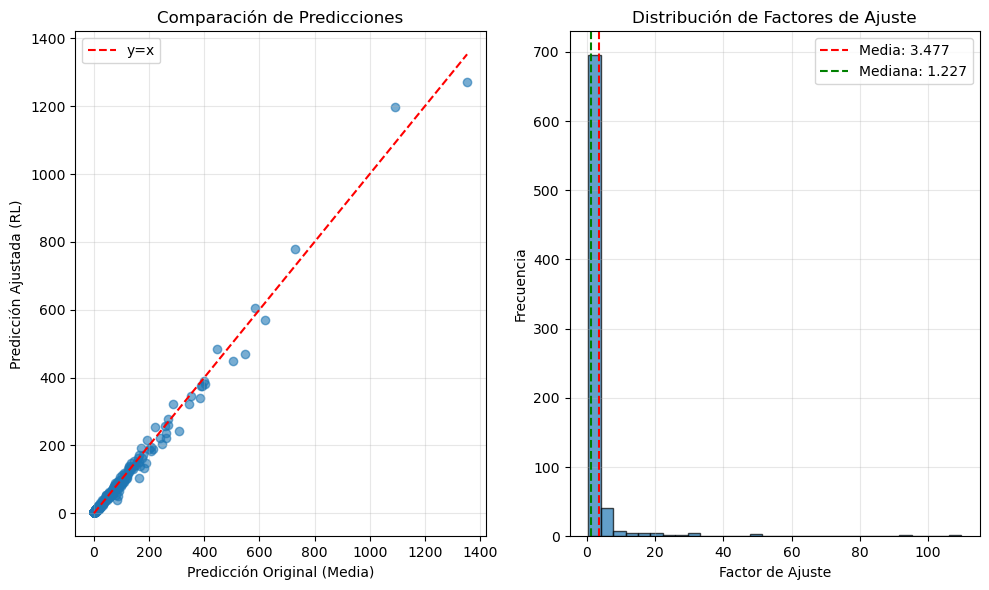


📊 Gráficos generados para analizar el ajuste de 780 productos


In [103]:
# PASO 19 (Opcional): Visualizar la comparación de predicciones
if pred_medias_093 is not None and len(productos_comunes) > 0:
    # Crear un scatter plot para comparar predicciones originales vs ajustadas
    plt.figure(figsize=(10, 6))
    
    # Subplot 1: Comparación directa
    plt.subplot(1, 2, 1)
    plt.scatter(pred_medias_filtrado['tn'], pred_ajustado_final['tn'], alpha=0.6)
    plt.plot([0, pred_medias_filtrado['tn'].max()], [0, pred_medias_filtrado['tn'].max()], 'r--', label='y=x')
    plt.xlabel('Predicción Original (Media)')
    plt.ylabel('Predicción Ajustada (RL)')
    plt.title('Comparación de Predicciones')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Subplot 2: Distribución de factores de ajuste
    plt.subplot(1, 2, 2)
    plt.hist(pred_medias_filtrado['factor_ajuste'], bins=30, alpha=0.7, edgecolor='black')
    plt.axvline(pred_medias_filtrado['factor_ajuste'].mean(), color='red', linestyle='--', 
                label=f'Media: {pred_medias_filtrado["factor_ajuste"].mean():.3f}')
    plt.axvline(pred_medias_filtrado['factor_ajuste'].median(), color='green', linestyle='--',
                label=f'Mediana: {pred_medias_filtrado["factor_ajuste"].median():.3f}')
    plt.xlabel('Factor de Ajuste')
    plt.ylabel('Frecuencia')
    plt.title('Distribución de Factores de Ajuste')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📊 Gráficos generados para analizar el ajuste de {len(pred_medias_filtrado)} productos")

In [104]:
# PASO 20: Crear archivo con formato similar al de regresión lineal v2
# Creamos un archivo con los datos ajustados pero en el mismo formato que pred_regresion_lineal_v2_todos_los_datos.csv
if pred_medias_093 is not None and len(productos_comunes) > 0:
    # Crear DataFrame con el mismo formato que el archivo de regresión lineal v2
    pred_coef_final = pred_medias_filtrado[['product_id', 'tn_ajustado']].copy()
    pred_coef_final.rename(columns={'tn_ajustado': 'tn'}, inplace=True)
    
    # Ordenar por product_id para consistencia
    pred_coef_final.sort_values('product_id', inplace=True)
    pred_coef_final.reset_index(drop=True, inplace=True)
    
    # Guardar el archivo con el nombre solicitado
    filename_coef = "data/pred_coef_rl02_medias_093_12.csv"
    pred_coef_final.to_csv(filename_coef, index=False, encoding="utf-8")
    
    print(f"✓ Archivo con coeficientes ajustados guardado: {filename_coef}")
    print(f"Total de productos: {len(pred_coef_final)}")
    print(f"Formato: {list(pred_coef_final.columns)}")
    
    # Mostrar estadísticas del archivo creado
    print(f"\nEstadísticas del archivo pred_coef_rl02_medias_093_12.csv:")
    print(f"- Productos incluidos: {len(pred_coef_final)}")
    print(f"- Suma total de tn: {pred_coef_final['tn'].sum():.2f}")
    print(f"- Promedio de tn: {pred_coef_final['tn'].mean():.2f}")
    print(f"- tn máximo: {pred_coef_final['tn'].max():.2f}")
    print(f"- tn mínimo: {pred_coef_final['tn'].min():.2f}")
    
    print(f"\nPrimeras 10 filas del archivo:")
    print(pred_coef_final.head(10))
    
    print(f"\nÚltimas 5 filas del archivo:")
    print(pred_coef_final.tail(5))
    
else:
    print("❌ No se pudo crear el archivo pred_coef_rl02_medias_093_12.csv")

✓ Archivo con coeficientes ajustados guardado: data/pred_coef_rl02_medias_093_12.csv
Total de productos: 780
Formato: ['product_id', 'tn']

Estadísticas del archivo pred_coef_rl02_medias_093_12.csv:
- Productos incluidos: 780
- Suma total de tn: 28805.38
- Promedio de tn: 36.93
- tn máximo: 1272.04
- tn mínimo: 2.30

Primeras 10 filas del archivo:
   product_id           tn
0       20001  1272.038684
1       20002  1196.271738
2       20003   779.366959
3       20004   605.713230
4       20005   569.928575
5       20006   483.541044
6       20007   379.999033
7       20008   375.582630
8       20009   447.498852
9       20010   390.494420

Últimas 5 filas del archivo:
     product_id        tn
775       21263  2.572287
776       21265  2.653513
777       21266  2.655442
778       21267  2.635107
779       21276  2.591837


## Resumen de Archivos Generados

Se han creado cuatro archivos de predicciones con diferentes enfoques:

### 1. **pred_regresion_lineal_v2_todos_los_datos.csv**
- **Método**: Regresión lineal pura entrenada con todos los datos de dic-2018
- **Características**: Modelo directo sin ajustes externos
- **Productos**: Todos los productos vigentes (780)

### 2. **pred_093_12_ajustado_rl02.csv** 
- **Método**: Predicciones de medias ajustadas con factores de regresión lineal
- **Características**: Toma pred_medias_12_093.csv y lo multiplica por factores del modelo RL
- **Productos**: Solo productos comunes entre medias y dataset de entrenamiento

### 3. **pred_coef_rl02_medias_093_12.csv**
- **Método**: Mismo que #2 pero con formato idéntico al archivo #1
- **Características**: Datos de medias ajustados en formato estándar para comparación
- **Productos**: Misma cantidad que #2

### 4. **pred_coef_rl02_trivial_12.csv** ⭐ NUEVO
- **Método**: Predicciones triviales ajustadas con factores de regresión lineal
- **Características**: Toma pred_trivial_media12.csv y lo ajusta con coeficientes del modelo RL
- **Productos**: Solo productos comunes entre triviales y dataset de entrenamiento

**Recomendación**: Comparar performance de los cuatro enfoques para seleccionar el mejor. Los archivos #3 y #4 permiten comparación directa al tener el mismo formato.

## Ajuste de Predicciones Triviales con Coeficientes de Regresión Lineal

En esta sección vamos a aplicar el mismo proceso de ajuste pero usando las predicciones triviales:
1. Cargar las predicciones de `pred_trivial_media12.csv`
2. Aplicar los coeficientes del modelo de regresión lineal entrenado
3. Generar el archivo `pred_coef_rl02_trivial_12.csv`

In [105]:
# PASO 21: Cargar las predicciones triviales de media 12
# Cargamos el archivo pred_trivial_media12.csv que contiene las predicciones triviales base
try:
    pred_trivial_12 = pd.read_csv("data/pred_trivial_media12.csv")
    print(f"✓ Archivo trivial cargado exitosamente: {len(pred_trivial_12)} productos")
    print(f"Columnas disponibles: {list(pred_trivial_12.columns)}")
    pred_trivial_12.head()
except FileNotFoundError:
    print("❌ Error: No se encontró el archivo data/pred_trivial_media12.csv")
    print("Verifica que el archivo existe en la carpeta data/")
    pred_trivial_12 = None

✓ Archivo trivial cargado exitosamente: 780 productos
Columnas disponibles: ['product_id', 'tn']


In [106]:
# PASO 22: Calcular factor de ajuste para predicciones triviales
# Aplicamos el mismo proceso que con las medias pero usando las predicciones triviales
if pred_trivial_12 is not None:
    # Verificar productos en común entre pred_trivial_12 y dataset_final
    productos_comunes_trivial = set(pred_trivial_12['product_id']) & set(dataset_final['product_id'])
    print(f"Productos en común entre pred_trivial_12 y dataset_final: {len(productos_comunes_trivial)}")
    
    # Filtrar solo productos comunes
    pred_trivial_filtrado = pred_trivial_12[pred_trivial_12['product_id'].isin(productos_comunes_trivial)].copy()
    dataset_trivial_ajuste = dataset_final[dataset_final['product_id'].isin(productos_comunes_trivial)].copy()
    
    print(f"Productos triviales que se pueden ajustar: {len(pred_trivial_filtrado)}")
    
    # Mostrar estadísticas de las predicciones triviales originales
    print(f"\nEstadísticas predicciones triviales originales:")
    print(f"- Suma total: {pred_trivial_filtrado['tn'].sum():.2f}")
    print(f"- Promedio: {pred_trivial_filtrado['tn'].mean():.2f}")
    print(f"- Máximo: {pred_trivial_filtrado['tn'].max():.2f}")
    print(f"- Mínimo: {pred_trivial_filtrado['tn'].min():.2f}")
else:
    print("No se puede proceder sin el archivo de predicciones triviales")

Productos en común entre pred_trivial_12 y dataset_final: 780
Productos triviales que se pueden ajustar: 780

Estadísticas predicciones triviales originales:
- Suma total: 30644.42
- Promedio: 39.29
- Máximo: 1454.73
- Mínimo: 0.03


In [107]:
# PASO 23: Aplicar ajuste de regresión lineal a predicciones triviales
if pred_trivial_12 is not None and len(productos_comunes_trivial) > 0:
    # Ordenar ambos DataFrames por product_id para asegurar alineación
    pred_trivial_filtrado = pred_trivial_filtrado.sort_values('product_id').reset_index(drop=True)
    dataset_trivial_ajuste = dataset_trivial_ajuste.sort_values('product_id').reset_index(drop=True)
    
    # Generar predicciones del modelo de regresión para estos productos
    X_trivial_ajuste = dataset_trivial_ajuste[feature_cols]
    prediccion_rl_trivial = lr.predict(X_trivial_ajuste)
    
    # Calcular factor de ajuste: predicción_RL / predicción_trivial
    pred_trivial_filtrado['prediccion_rl'] = prediccion_rl_trivial
    
    # Evitar división por cero
    pred_trivial_filtrado['factor_ajuste'] = np.where(
        pred_trivial_filtrado['tn'] != 0,
        pred_trivial_filtrado['prediccion_rl'] / pred_trivial_filtrado['tn'],
        1.0  # Si la predicción trivial original es 0, no ajustamos
    )
    
    # Aplicar el ajuste
    pred_trivial_filtrado['tn_ajustado'] = pred_trivial_filtrado['tn'] * pred_trivial_filtrado['factor_ajuste']
    
    print("Estadísticas del ajuste para predicciones triviales:")
    print(f"Factor de ajuste promedio: {pred_trivial_filtrado['factor_ajuste'].mean():.4f}")
    print(f"Factor de ajuste mediano: {pred_trivial_filtrado['factor_ajuste'].median():.4f}")
    print(f"Rango del factor: {pred_trivial_filtrado['factor_ajuste'].min():.4f} - {pred_trivial_filtrado['factor_ajuste'].max():.4f}")
    
    print("\nComparación antes y después del ajuste:")
    print(f"Suma original (trivial): {pred_trivial_filtrado['tn'].sum():.2f}")
    print(f"Suma ajustada: {pred_trivial_filtrado['tn_ajustado'].sum():.2f}")
    print(f"Diferencia: {(pred_trivial_filtrado['tn_ajustado'].sum() - pred_trivial_filtrado['tn'].sum()):.2f}")
    
    pred_trivial_filtrado[['product_id', 'tn', 'prediccion_rl', 'factor_ajuste', 'tn_ajustado']].head(10)

Estadísticas del ajuste para predicciones triviales:
Factor de ajuste promedio: 3.2338
Factor de ajuste mediano: 1.1413
Rango del factor: 0.4242 - 102.0483

Comparación antes y después del ajuste:
Suma original (trivial): 30644.42
Suma ajustada: 28805.38
Diferencia: -1839.04


In [108]:
# PASO 24: Crear archivo final para predicciones triviales ajustadas
if pred_trivial_12 is not None and len(productos_comunes_trivial) > 0:
    # Crear DataFrame con formato estándar para predicciones triviales ajustadas
    pred_trivial_coef_final = pred_trivial_filtrado[['product_id', 'tn_ajustado']].copy()
    pred_trivial_coef_final.rename(columns={'tn_ajustado': 'tn'}, inplace=True)
    
    # Ordenar por product_id para consistencia
    pred_trivial_coef_final.sort_values('product_id', inplace=True)
    pred_trivial_coef_final.reset_index(drop=True, inplace=True)
    
    # Guardar el archivo con el nombre solicitado
    filename_trivial_coef = "data/pred_coef_rl02_trivial_12.csv"
    pred_trivial_coef_final.to_csv(filename_trivial_coef, index=False, encoding="utf-8")
    
    print(f"✓ Archivo trivial ajustado guardado: {filename_trivial_coef}")
    print(f"Total de productos: {len(pred_trivial_coef_final)}")
    print(f"Formato: {list(pred_trivial_coef_final.columns)}")
    
    # Mostrar estadísticas del archivo creado
    print(f"\nEstadísticas del archivo pred_coef_rl02_trivial_12.csv:")
    print(f"- Productos incluidos: {len(pred_trivial_coef_final)}")
    print(f"- Suma total de tn: {pred_trivial_coef_final['tn'].sum():.2f}")
    print(f"- Promedio de tn: {pred_trivial_coef_final['tn'].mean():.2f}")
    print(f"- tn máximo: {pred_trivial_coef_final['tn'].max():.2f}")
    print(f"- tn mínimo: {pred_trivial_coef_final['tn'].min():.2f}")
    
    print(f"\nPrimeras 10 filas del archivo:")
    print(pred_trivial_coef_final.head(10))
    
    print(f"\nÚltimas 5 filas del archivo:")
    print(pred_trivial_coef_final.tail(5))
    
else:
    print("❌ No se pudo crear el archivo pred_coef_rl02_trivial_12.csv")

✓ Archivo trivial ajustado guardado: data/pred_coef_rl02_trivial_12.csv
Total de productos: 780
Formato: ['product_id', 'tn']

Estadísticas del archivo pred_coef_rl02_trivial_12.csv:
- Productos incluidos: 780
- Suma total de tn: 28805.38
- Promedio de tn: 36.93
- tn máximo: 1272.04
- tn mínimo: 2.30

Primeras 10 filas del archivo:
   product_id           tn
0       20001  1272.038684
1       20002  1196.271738
2       20003   779.366959
3       20004   605.713230
4       20005   569.928575
5       20006   483.541044
6       20007   379.999033
7       20008   375.582630
8       20009   447.498852
9       20010   390.494420

Últimas 5 filas del archivo:
     product_id        tn
775       21263  2.572287
776       21265  2.653513
777       21266  2.655442
778       21267  2.635107
779       21276  2.591837


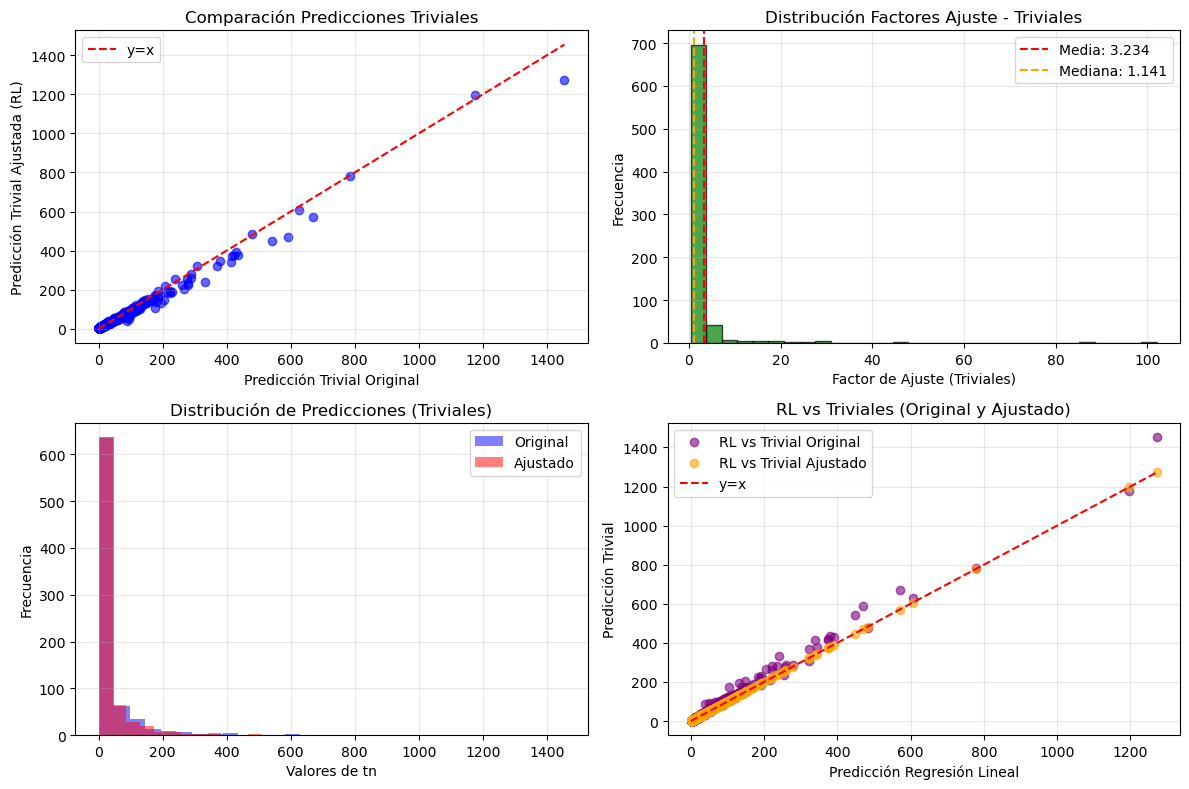


📊 Gráficos de análisis trivial generados para 780 productos


In [109]:
# PASO 25 (Opcional): Visualizar comparación de predicciones triviales
if pred_trivial_12 is not None and len(productos_comunes_trivial) > 0:
    # Crear visualización para comparar predicciones triviales originales vs ajustadas
    plt.figure(figsize=(12, 8))
    
    # Subplot 1: Comparación directa triviales
    plt.subplot(2, 2, 1)
    plt.scatter(pred_trivial_filtrado['tn'], pred_trivial_coef_final['tn'], alpha=0.6, color='blue')
    plt.plot([0, pred_trivial_filtrado['tn'].max()], [0, pred_trivial_filtrado['tn'].max()], 'r--', label='y=x')
    plt.xlabel('Predicción Trivial Original')
    plt.ylabel('Predicción Trivial Ajustada (RL)')
    plt.title('Comparación Predicciones Triviales')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Subplot 2: Distribución de factores triviales
    plt.subplot(2, 2, 2)
    plt.hist(pred_trivial_filtrado['factor_ajuste'], bins=30, alpha=0.7, edgecolor='black', color='green')
    plt.axvline(pred_trivial_filtrado['factor_ajuste'].mean(), color='red', linestyle='--', 
                label=f'Media: {pred_trivial_filtrado["factor_ajuste"].mean():.3f}')
    plt.axvline(pred_trivial_filtrado['factor_ajuste'].median(), color='orange', linestyle='--',
                label=f'Mediana: {pred_trivial_filtrado["factor_ajuste"].median():.3f}')
    plt.xlabel('Factor de Ajuste (Triviales)')
    plt.ylabel('Frecuencia')
    plt.title('Distribución Factores Ajuste - Triviales')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Subplot 3: Comparación de distribuciones de tn
    plt.subplot(2, 2, 3)
    plt.hist(pred_trivial_filtrado['tn'], bins=30, alpha=0.5, label='Original', color='blue')
    plt.hist(pred_trivial_coef_final['tn'], bins=30, alpha=0.5, label='Ajustado', color='red')
    plt.xlabel('Valores de tn')
    plt.ylabel('Frecuencia')
    plt.title('Distribución de Predicciones (Triviales)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Subplot 4: Comparación RL vs Trivial vs Ajustado
    plt.subplot(2, 2, 4)
    plt.scatter(pred_trivial_filtrado['prediccion_rl'], pred_trivial_filtrado['tn'], 
                alpha=0.6, label='RL vs Trivial Original', color='purple')
    plt.scatter(pred_trivial_filtrado['prediccion_rl'], pred_trivial_coef_final['tn'], 
                alpha=0.6, label='RL vs Trivial Ajustado', color='orange')
    plt.plot([0, pred_trivial_filtrado['prediccion_rl'].max()], 
             [0, pred_trivial_filtrado['prediccion_rl'].max()], 'r--', label='y=x')
    plt.xlabel('Predicción Regresión Lineal')
    plt.ylabel('Predicción Trivial')
    plt.title('RL vs Triviales (Original y Ajustado)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📊 Gráficos de análisis trivial generados para {len(pred_trivial_filtrado)} productos")